In [1]:
from numpy import *


In [2]:
#pca的实现
def pca1(X,k):#k is the components you want
  #mean of each feature
    n_samples, n_features = X.shape
    meanVals = mean(X,axis=0)#axis=0 对列求均值
  #normalization
    norm_X=X-meanVals
  #scatter matrix
    scatter_matrix=dot(transpose(norm_X),norm_X) #n_feature*n_feature方阵
  #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = linalg.eig(scatter_matrix) #linalg.eig只能计算方阵的特征值特征向量
    eig_pairs = [(abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
    print("eigvalues and egivectors of A.T*A",eig_pairs)
  # sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)
  # select the top k eig_vec
    feature=array([ele[1] for ele in eig_pairs[:k]])#k*n_feature
    print("components，Principal axes in feature space",feature)
  #get new data
    data=dot(norm_X,transpose(feature))#n_sample*n_feature dotproduct n_feature*k
    return mat(data)#经过pca变换后新维度下的数据值


In [3]:
X = array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = mat(X)
data = pca1(X,2)
data

eigvalues and egivectors of A.T*A [(39.69771560359221, matrix([[0.83849224],
        [0.54491354]])), (0.30228439640779037, matrix([[-0.54491354],
        [ 0.83849224]]))]
components，Principal axes in feature space [[[ 0.83849224]
  [ 0.54491354]]

 [[-0.54491354]
  [ 0.83849224]]]


matrix([[-1.38340578, -0.2935787 ],
        [-2.22189802,  0.25133484],
        [-3.6053038 , -0.04224385],
        [ 1.38340578,  0.2935787 ],
        [ 2.22189802, -0.25133484],
        [ 3.6053038 ,  0.04224385]])

In [4]:
from sklearn.decomposition import PCA
X = array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)#Principal axes in feature space
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]
[7.93954312 0.06045688]
[0.99244289 0.00755711]
[6.30061232 0.54980396]


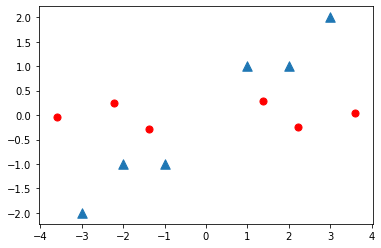

In [6]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[:,0].flatten(),X[:,1].flatten(),marker='^',s=90)
ax.scatter(data[:,0].flatten().A[0],data[:,1].flatten().A[0],marker='o',s=50,c='red')

In [7]:
eigVals,eigVects = linalg.eig([[-1, -1], [-2, -1]])

In [8]:
eigVals

array([ 0.41421356, -2.41421356])

In [9]:
eigVects[:,0]

array([ 0.57735027, -0.81649658])

In [10]:
eigVects

array([[ 0.57735027,  0.57735027],
       [-0.81649658,  0.81649658]])

A.T * A与A*A.T特征值相同，是相似矩阵。这两个矩阵A.T * A与A*A.T是对称矩阵所以特征向量正交

In [11]:
ev1,ec1 = linalg.eig(eigVects * eigVects.T)

In [12]:
ev1

array([1.11022302e-16, 1.00000000e+00])

In [13]:
ec1

array([[-0.81649658,  0.57735027],
       [-0.57735027, -0.81649658]])

In [14]:
ev2,ec2 = linalg.eig(eigVects.T * eigVects)

In [15]:
ev2

array([1.11022302e-16, 1.00000000e+00])

In [16]:
ec2

array([[-0.81649658,  0.57735027],
       [-0.57735027, -0.81649658]])

In [17]:
a1=[1,3,5,4,7]
a1[:-4:-1]

[7, 4, 5]

In [18]:
a2=[1,3,5,4,7]
b=argsort(a2)
b[:-4:-1]


array([4, 2, 3])